In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv("../Life Expectancy Data.csv")

# 1) Exploratory Data Analysis

#### What does the data set look like?
  

In [19]:
#Exploring Draft review of data
print("Rows: ",df.shape[0]," & Columns: ", df.shape[1])
print("Total Features: ", df.columns.values)
print(df.head)
#example of record:
print(df.iloc[0])
print(df.dtypes)
print(df['Country'].value_counts())
print(df['Status'].value_counts())
print(df.isna().sum())

Rows:  2938  & Columns:  22
Total Features:  ['Country' 'Year' 'Status' 'Life_Expectancy' 'Adult_Mortality'
 'Infant_Deaths' 'Alcohol' 'Percentage_Expenditure' 'Hepatitis_B_Vaccine'
 'Measles_Vaccine' 'Body_Mass_Index' 'Deaths_Under_5' 'Polio_Vaccine'
 'Total_Expenditure' 'Diphtheria_Vaccine' 'HIV/AIDS_Cases' 'GDP'
 'Population' 'Thinness_1-19_Years' 'Thinness_5-9_Years'
 'Income_Composition_of_Resources' 'Schooling']
<bound method NDFrame.head of           Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing  

#### Basic Structure Overview:
- It is a 2,938 by 22 data set
    - 21 Feature and 1 target variable (Life Expectancy)

#### Feature(s): 
- The column names
    - are a bit messy, with spaces and inconsistancy 
    -Solution: will relabel the features to look consistent

In [3]:
#change the column names the remove extra spacing:
d = {
    'Country': 'Country', 
    'Year': 'Year', 
    'Status': 'Status', 
    'Life expectancy ': 'Life_Expectancy', 
    'Adult Mortality': 'Adult_Mortality',
    'infant deaths': 'Infant_Deaths', 
    'Alcohol': 'Alcohol', 
    'percentage expenditure': 'Percentage_Expenditure', 
    'Hepatitis B': 'Hepatitis_B_Vaccine',
    'Measles ': 'Measles_Vaccine', 
    ' BMI ': 'Body_Mass_Index', 
    'under-five deaths ':'Deaths_Under_5', 
    'Polio': 'Polio_Vaccine', 
    'Total expenditure': 'Total_Expenditure',
    'Diphtheria ': "Diphtheria_Vaccine", 
    ' HIV/AIDS': 'HIV/AIDS_Cases', 
    'GDP':'GDP', 
    'Population':'Population',
    ' thinness  1-19 years':'Thinness_1-19_Years', 
    ' thinness 5-9 years': 'Thinness_5-9_Years',
    'Income composition of resources': 'Income_Composition_of_Resources', 
    'Schooling': 'Schooling'
}
df = df.rename(columns = d, inplace = False)

In [74]:
#confirm that the Column names have changed
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure',
       'Hepatitis_B_Vaccine', 'Measles_Vaccine', 'Body_Mass_Index',
       'Deaths_Under_5', 'Polio_Vaccine', 'Total_Expenditure',
       'Diphtheria_Vaccine', 'HIV/AIDS_Cases', 'GDP', 'Population',
       'Thinness_1-19_Years', 'Thinness_5-9_Years',
       'Income_Composition_of_Resources', 'Schooling'],
      dtype='object')

In [155]:
#Feature Data Types:
print(df.dtypes)

Country                             object
Year                                 int64
Status                              object
Life_Expectancy                    float64
Adult_Mortality                    float64
Infant_Deaths                        int64
Alcohol                            float64
Percentage_Expenditure             float64
Hepatitis_B_Vaccine                float64
Measles_Vaccine                      int64
Body_Mass_Index                    float64
Deaths_Under_5                       int64
Polio_Vaccine                      float64
Total_Expenditure                  float64
Diphtheria_Vaccine                 float64
HIV/AIDS_Cases                     float64
GDP                                float64
Population                         float64
Thinness_1-19_Years                float64
Thinness_5-9_Years                 float64
Income_Composition_of_Resources    float64
Schooling                          float64
dtype: object


In [12]:
#for i in df.columns:
##    print("-- Descrp for ",i," -- ")
#    print(df[i].describe())
#    print("________________________________________")

In [11]:
df.describe()

Year  Life_Expectancy  Adult_Mortality  Infant_Deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage_Expenditure  Hepatitis_B_Vaccine  \
count  2744.000000             2938.000000          2385.000000   
mean      4.602861              738.251295            80.940461   
std       4.052413             1987.914858            25.070016   
min       0.010000                0.000000             1.000000   
25%       0.877500                4.685343            77.000000   
50%       3.755000               64.912906            92.000000   
75%       7.702500              441.534144            97.000000   
max      17.870000            19479.911610            99.000000   

       Measles_Vaccine  Body_Mass_Index  Deaths_Under_5  Polio_Vaccine  \
count      2938.000000      2904.000000     2938.000000    2919.000000   
mean       2419.592240        38.321247       42.035739      82.550188   
std       11467.272489        20.044034      160.445548      23.428046   
min           0.000000         1.000000        0.000000       3.000000   
25%           0.000000        19.300000        0.000000      78.000000   
50%          17.000000        43.500000        4.000000      93.000000   
75%         360.250000        56.200000       28.000000      97.000000   
max      212183.000000        87.300000     2500.000000      99.000000   

       Total_Expenditure  Diphtheria_Vaccine  HIV/AIDS_Cases            GDP  \
count         2712.00000         2919.000000     2938.000000    2490.000000   
mean             5.93819           82.324084        1.742103    7483.158469   
std              2.49832           23.716912        5.077785   14270.169342   
min              0.37000            2.000000        0.100000       1.681350   
25%              4.26000           78.000000        0.100000     463.935626   
50%              5.75500           93.000000        0.100000    1766.947595   
75%              7.49250           97.000000        0.800000    5910.806335   
max             17.60000           99.000000       50.600000  119172.741800   

         Population  Thinness_1-19_Years  Thinness_5-9_Years  \
count  2.286000e+03          2904.000000         2904.000000   
mean   1.275338e+07             4.839704            4.870317   
std    6.101210e+07             4.420195            4.508882   
min    3.400000e+01             0.100000            0.100000   
25%    1.957932e+05             1.600000            1.500000   
50%    1.386542e+06             3.300000            3.300000   
75%    7.420359e+06             7.200000            7.200000   
max    1.293859e+09            27.700000           28.600000   

       Income_Composition_of_Resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

#### Visualizing the Categorical Features: 

I will bring in the 2 categorical (colums with object type) and display them on a bar plot.

###### First, we start with 'COUNTRY':
note: would need to see whihc year for each country we have to work with!!! - maxmaxscalr -can be done on splitting

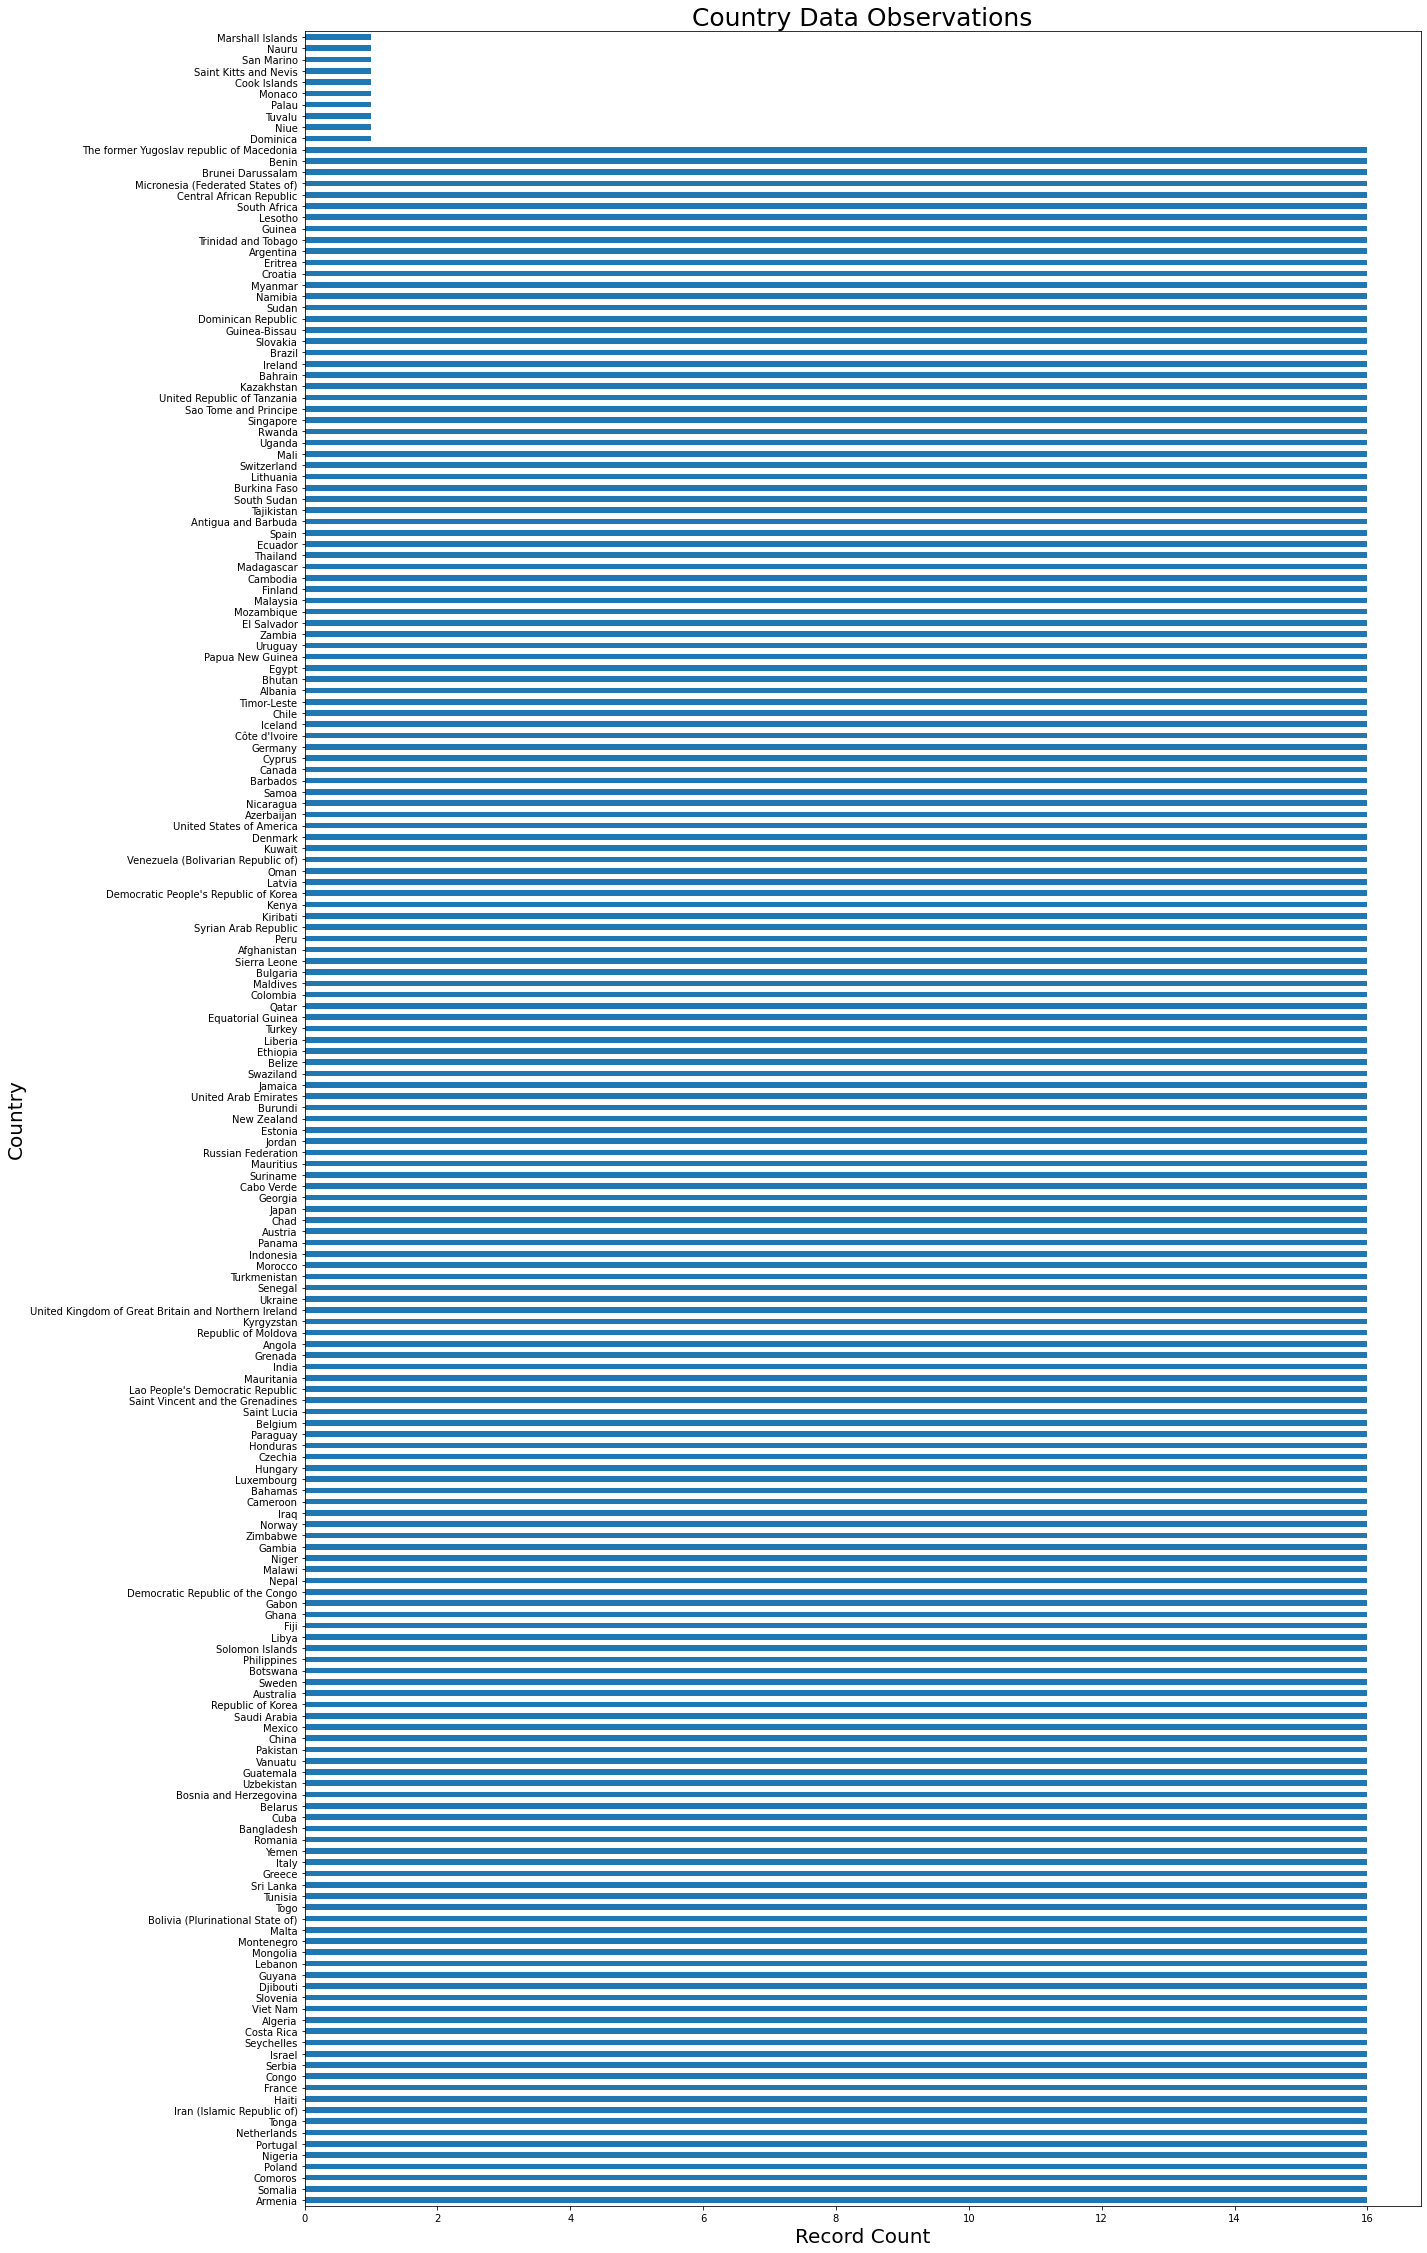

In [178]:
pd.value_counts(df['Country']).plot.barh(figsize=(20,40))

plt.xlabel('Record Count', fontsize=20)


plt.ylabel('Country', fontsize=20)

plt.title('Country Data Observations', fontsize=25)
plt.show()

#### Findings: 
There are 193 countries in this dataset and that makes visualizing using bar chart easy. We review to see if there is another visual that can serve better. We also see that certain group of countries have much less records than others. This might be because they might not have all the years from 2000-2015 recorded. I will dive in a bit more.

In [179]:
ctry_cnt = pd.DataFrame(pd.value_counts(df['Country']).reset_index().values, columns=["Country", "Years_Collected"])
ctry_cntindex = ctry_cnt.sort_index(axis = 0, ascending=True)

Missing_Years = ctry_cnt.query('Years_Collected < 16')

lownum_countries = df[df['Country'].isin(Missing_Years['Country'])]

lownum_countries

Country  Year      Status  Life_Expectancy  \
624            Cook Islands  2013  Developing              NaN   
769                Dominica  2013  Developing              NaN   
1650       Marshall Islands  2013  Developing              NaN   
1715                 Monaco  2013  Developing              NaN   
1812                  Nauru  2013  Developing              NaN   
1909                   Niue  2013  Developing              NaN   
1958                  Palau  2013  Developing              NaN   
2167  Saint Kitts and Nevis  2013  Developing              NaN   
2216             San Marino  2013  Developing              NaN   
2713                 Tuvalu  2013  Developing              NaN   

      Adult_Mortality  Infant_Deaths  Alcohol  Percentage_Expenditure  \
624               NaN              0     0.01                0.000000   
769               NaN              0     0.01               11.419555   
1650              NaN              0     0.01              871.878317   
1715              NaN              0     0.01                0.000000   
1812              NaN              0     0.01               15.606596   
1909              NaN              0     0.01                0.000000   
1958              NaN              0      NaN              344.690631   
2167              NaN              0     8.54                0.000000   
2216              NaN              0     0.01                0.000000   
2713              NaN              0     0.01               78.281203   

      Hepatitis_B_Vaccine  Measles_Vaccine  ...  Polio_Vaccine  \
624                  98.0                0  ...           98.0   
769                  96.0                0  ...           96.0   
1650                  8.0                0  ...           79.0   
1715                 99.0                0  ...           99.0   
1812                 87.0                0  ...           87.0   
1909                 99.0                0  ...           99.0   
1958                 99.0                0  ...           99.0   
2167                 97.0                0  ...           96.0   
2216                 69.0                0  ...           69.0   
2713                  9.0                0  ...            9.0   

      Total_Expenditure  Diphtheria_Vaccine  HIV/AIDS_Cases          GDP  \
624                3.58                98.0             0.1          NaN   
769                5.58                96.0             0.1   722.756650   
1650              17.24                79.0             0.1  3617.752354   
1715               4.30                99.0             0.1          NaN   
1812               4.65                87.0             0.1   136.183210   
1909               7.20                99.0             0.1          NaN   
1958               9.27                99.0             0.1  1932.122370   
2167               6.14                96.0             0.1          NaN   
2216               6.50                69.0             0.1          NaN   
2713              16.61                 9.0             0.1  3542.135890   

      Population  Thinness_1-19_Years  Thinness_5-9_Years  \
624          NaN                  0.1                 0.1   
769          NaN                  2.7                 2.6   
1650         NaN                  0.1                 0.1   
1715         NaN                  NaN                 NaN   
1812         NaN                  0.1                 0.1   
1909         NaN                  0.1                 0.1   
1958       292.0                  0.1                 0.1   
2167         NaN                  3.7                 3.6   
2216         NaN                  NaN                 NaN   
2713      1819.0                  0.2                 0.1   

      Income_Composition_of_Resources  Schooling  
624                               NaN        NaN  
769                             0.721       12.7  
1650                              NaN        0.0  
1715                              NaN        NaN 

#### Findings: 
There are 10 countries that have only one year on record. It is not even the last year of this collection, which is 2015. In the year 2013 these 10 countries were uniquely included in out dataset and never tracked again. Ideally, I would remove these records as they could cause skew and to add on top of that none of the records holds the target variable to learn from. 

Possible solution:
- understand how life might be predicted within the dataset itself - see: imputing missing values
- Filter out these records before we split
- Make sure to group 2013 together 

###### Second, we cotinue to 'STATUS':
Assumption is that the developed countries is higher than the developing country
- want to note that there are more developing countries

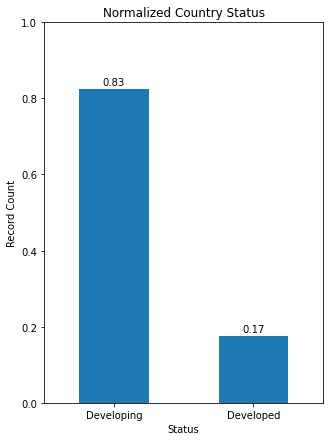

In [196]:
viz = pd.value_counts(df['Status'],normalize=True).plot.bar(figsize=(5,7))
#fig, ax = plt.subplots()

plt.ylabel('Record Count')
plt.ylim(0,1)

plt.xlabel('Status')
plt.xticks(rotation=0)

for p in viz.patches:
    viz.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 7),textcoords='offset points')
plt.title('Normalized Country Status')
plt.show()

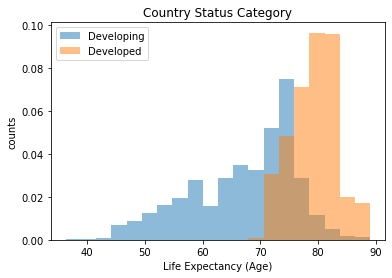

In [215]:
categories = df['Status'].unique()
bin_range = (df['Life_Expectancy'].min(),df['Life_Expectancy'].max())

for c in categories:
    plt.hist(df[df['Status']==c]['Life_Expectancy'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.title('Country Status Category')
plt.ylabel('counts')
plt.xlabel('Life Expectancy (Age)')
plt.show()

#### Findings: 
There are 2 statuses in this dataset. 83% of the records come from "Developing" countries and 17% come from "Developed" countries.

###### Third, we cotniue to 'Year':
Assumption is that as we move later into year the Life expectency increases due to improvements in medicine, etc.

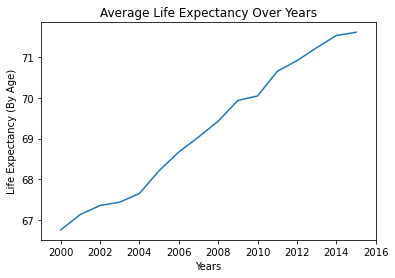

In [202]:
avg_df = df[['Year','Life_Expectancy']].groupby('Year').mean()
plt.plot(avg_df)
plt.title('Average Life Expectancy Over Years')
plt.xlabel('Years')
plt.ylabel('Life Expectancy (By Age)')
plt.xlim(1999,2016)
plt.show()

#### Findings: 
We do in fact see that that, on average, life expectancy does in fact increase through the years.

Now, I wonder what other feature also increases in this fashion?
- I will plot the other feature means and see if there is a correlation.

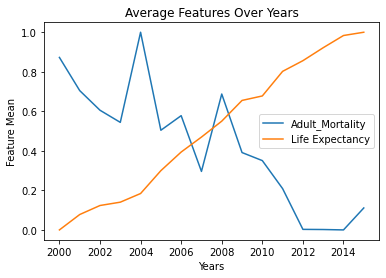

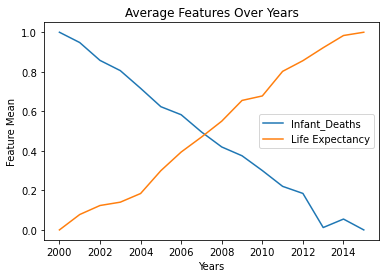

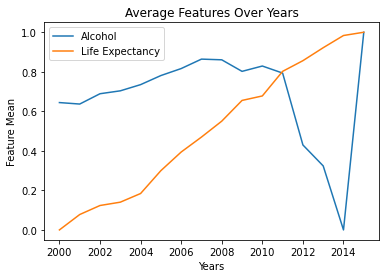

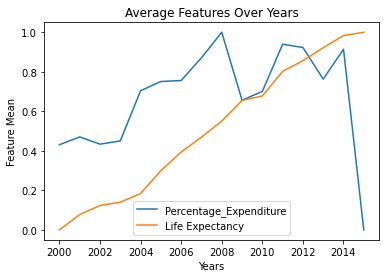

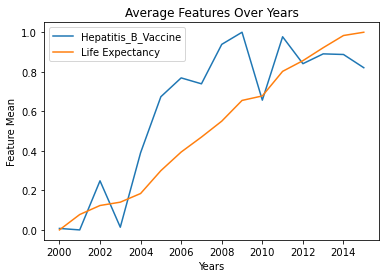

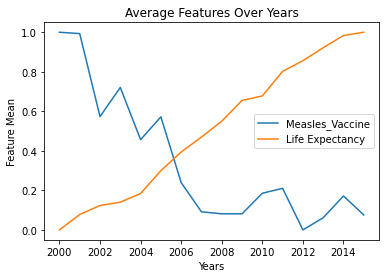

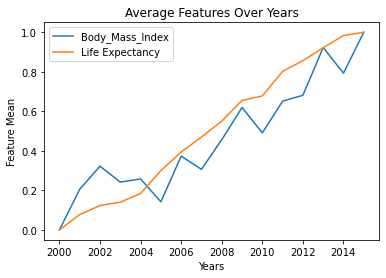

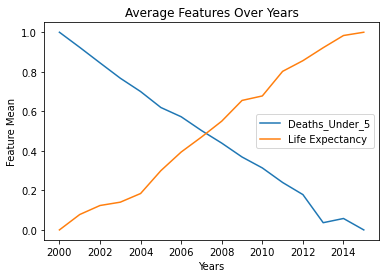

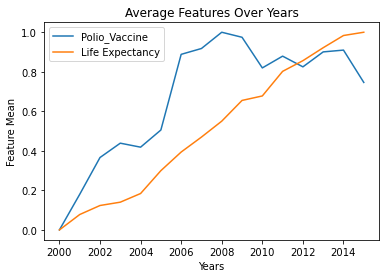

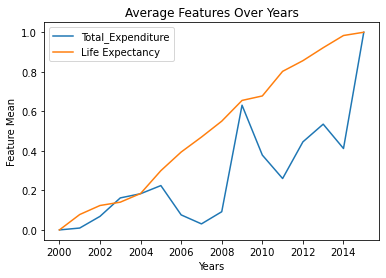

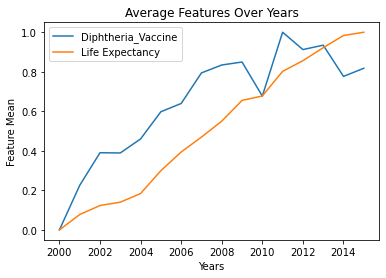

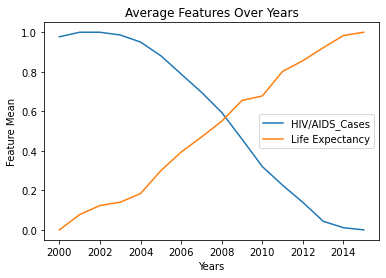

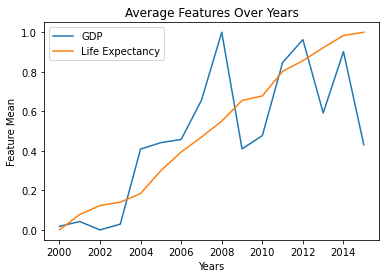

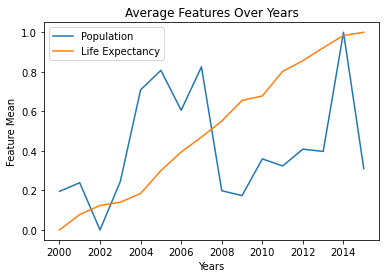

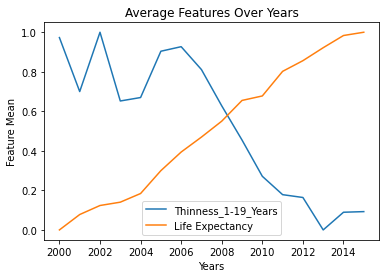

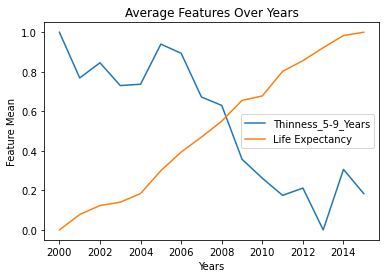

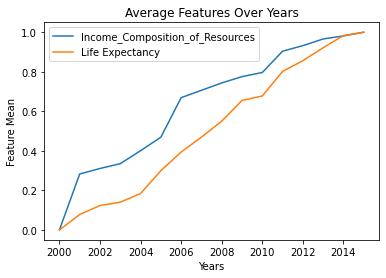

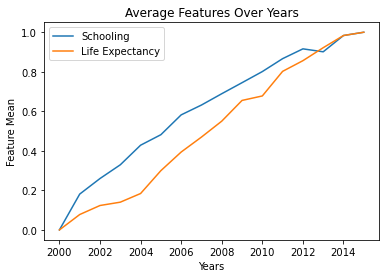

In [204]:
avg_dfall = df.groupby('Year').mean()

def norm(data):
    return ((data)-min(data))/(max(data)-min(data))


for i in avg_dfall.drop(['Life_Expectancy'], axis=1):
    plt.plot(norm(avg_dfall[i]), label= i)
    plt.plot(norm(avg_dfall['Life_Expectancy']), label= 'Life Expectancy')
    plt.title('Average Features Over Years')
    plt.xlabel('Years')
    plt.ylabel('Feature Mean')
    plt.legend()
    plt.show()

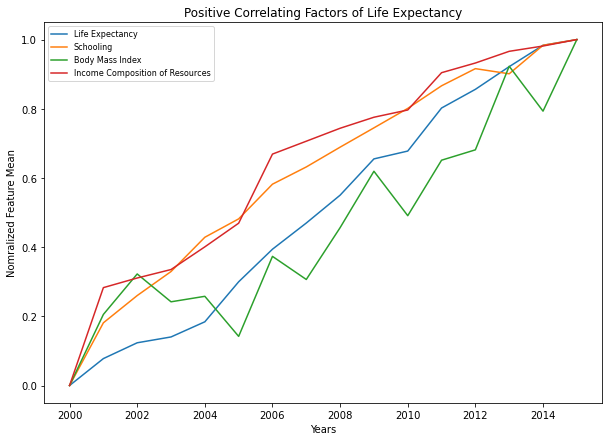

In [226]:
plt.plot(norm(avg_dfall['Life_Expectancy']), label= 'Life Expectancy')
plt.plot(norm(avg_dfall['Schooling']), label= 'Schooling')
plt.plot(norm(avg_dfall['Body_Mass_Index']), label= 'Body Mass Index')
plt.plot(norm(avg_dfall['Income_Composition_of_Resources']), label= 'Income Composition of Resources')
plt.figsize=(5,7)

plt.title('Positive Correlating Factors of Life Expectancy')
plt.xlabel('Years')
plt.ylabel('Nomralized Feature Mean')
plt.legend(fontsize=8)
fig = plt.gcf()
fig.set_size_inches(10, 7)

plt.show()


#### Findings: 
There are 3 strong positive correlations between it and life expectancy:
1) BMI

2) Income composition of resources

3) Schooling

Other Notes:
- The features below are redundant and need to be condensed to one:   
    - thinness 1-19 years:
        - thinness 5-9 years
        - thinness 1-19 years
    - Under-5 Deaths:
        - infant deaths
        - under-five deaths

#### Visualizing the Continuous Features: 

I will bring in the 19 continuous (colums with int/float type - excluding the target variable) and display them on a TBD plot.

- note switch year to categorical - represented well in bar so not contin...
- review gaps

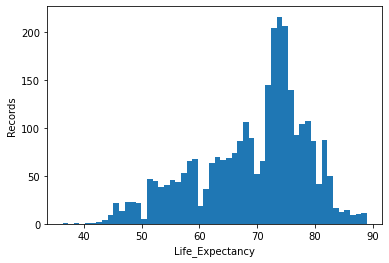

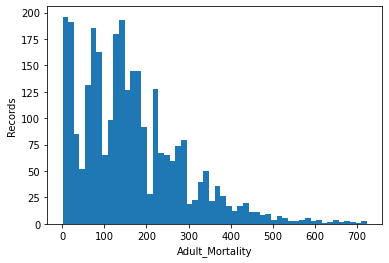

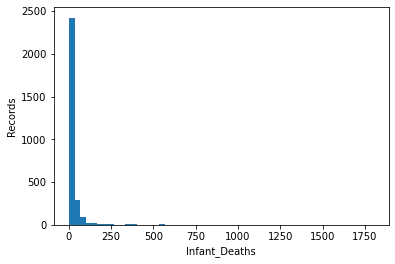

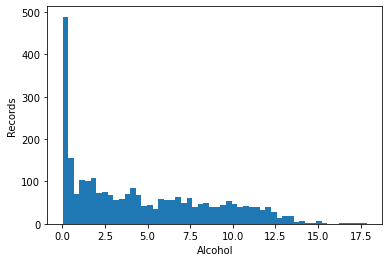

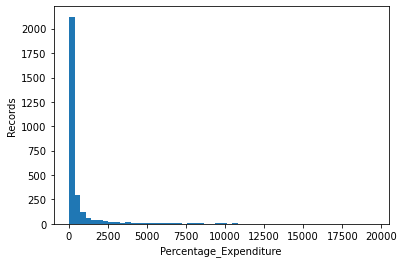

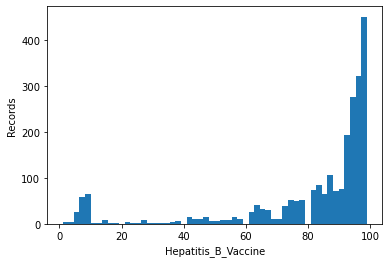

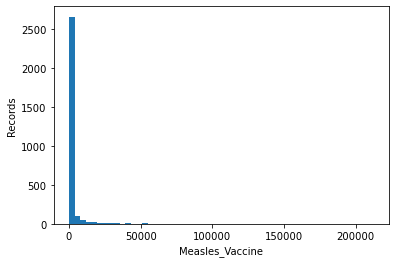

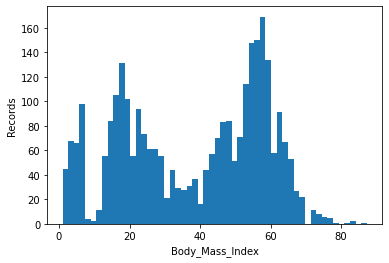

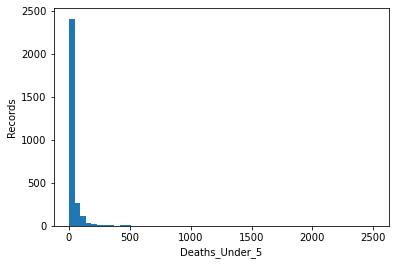

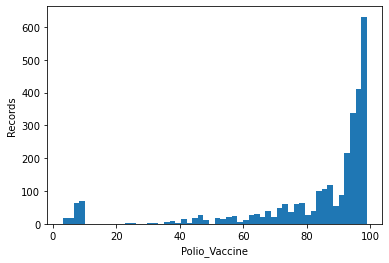

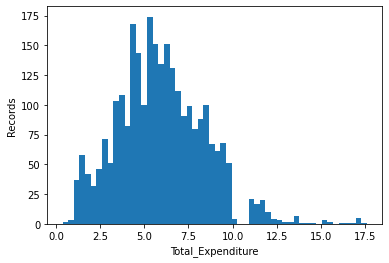

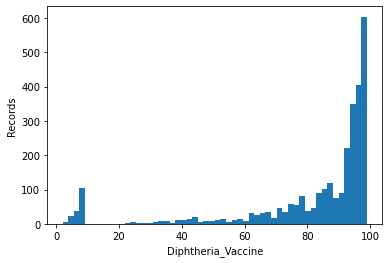

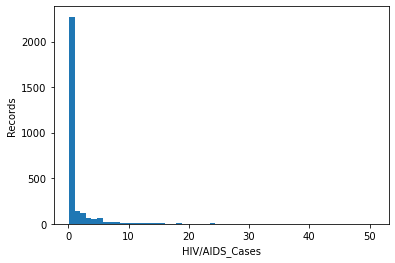

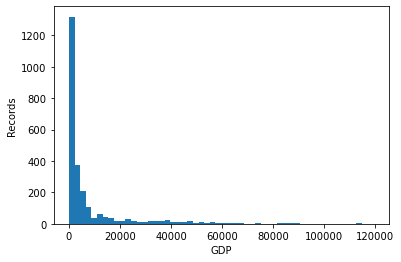

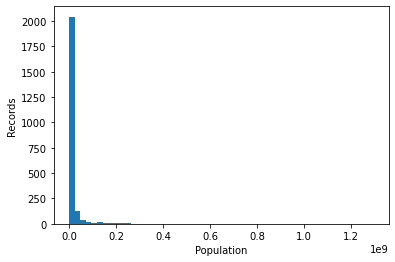

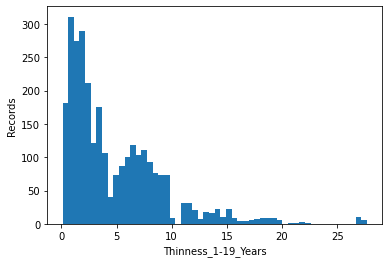

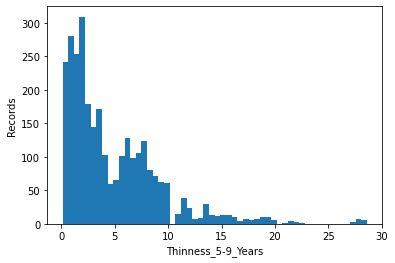

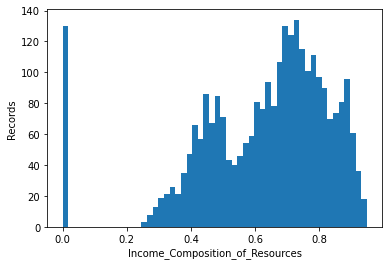

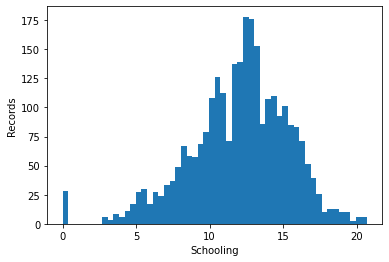

In [205]:
cont_columns = df.drop(['Country', 'Status', 'Year'], axis=1)
for i in cont_columns:
    df[i].plot.hist(bins = int(np.sqrt(df.shape[0])))
    plt.xlabel(i)
    plt.ylabel('Records')
    plt.show()

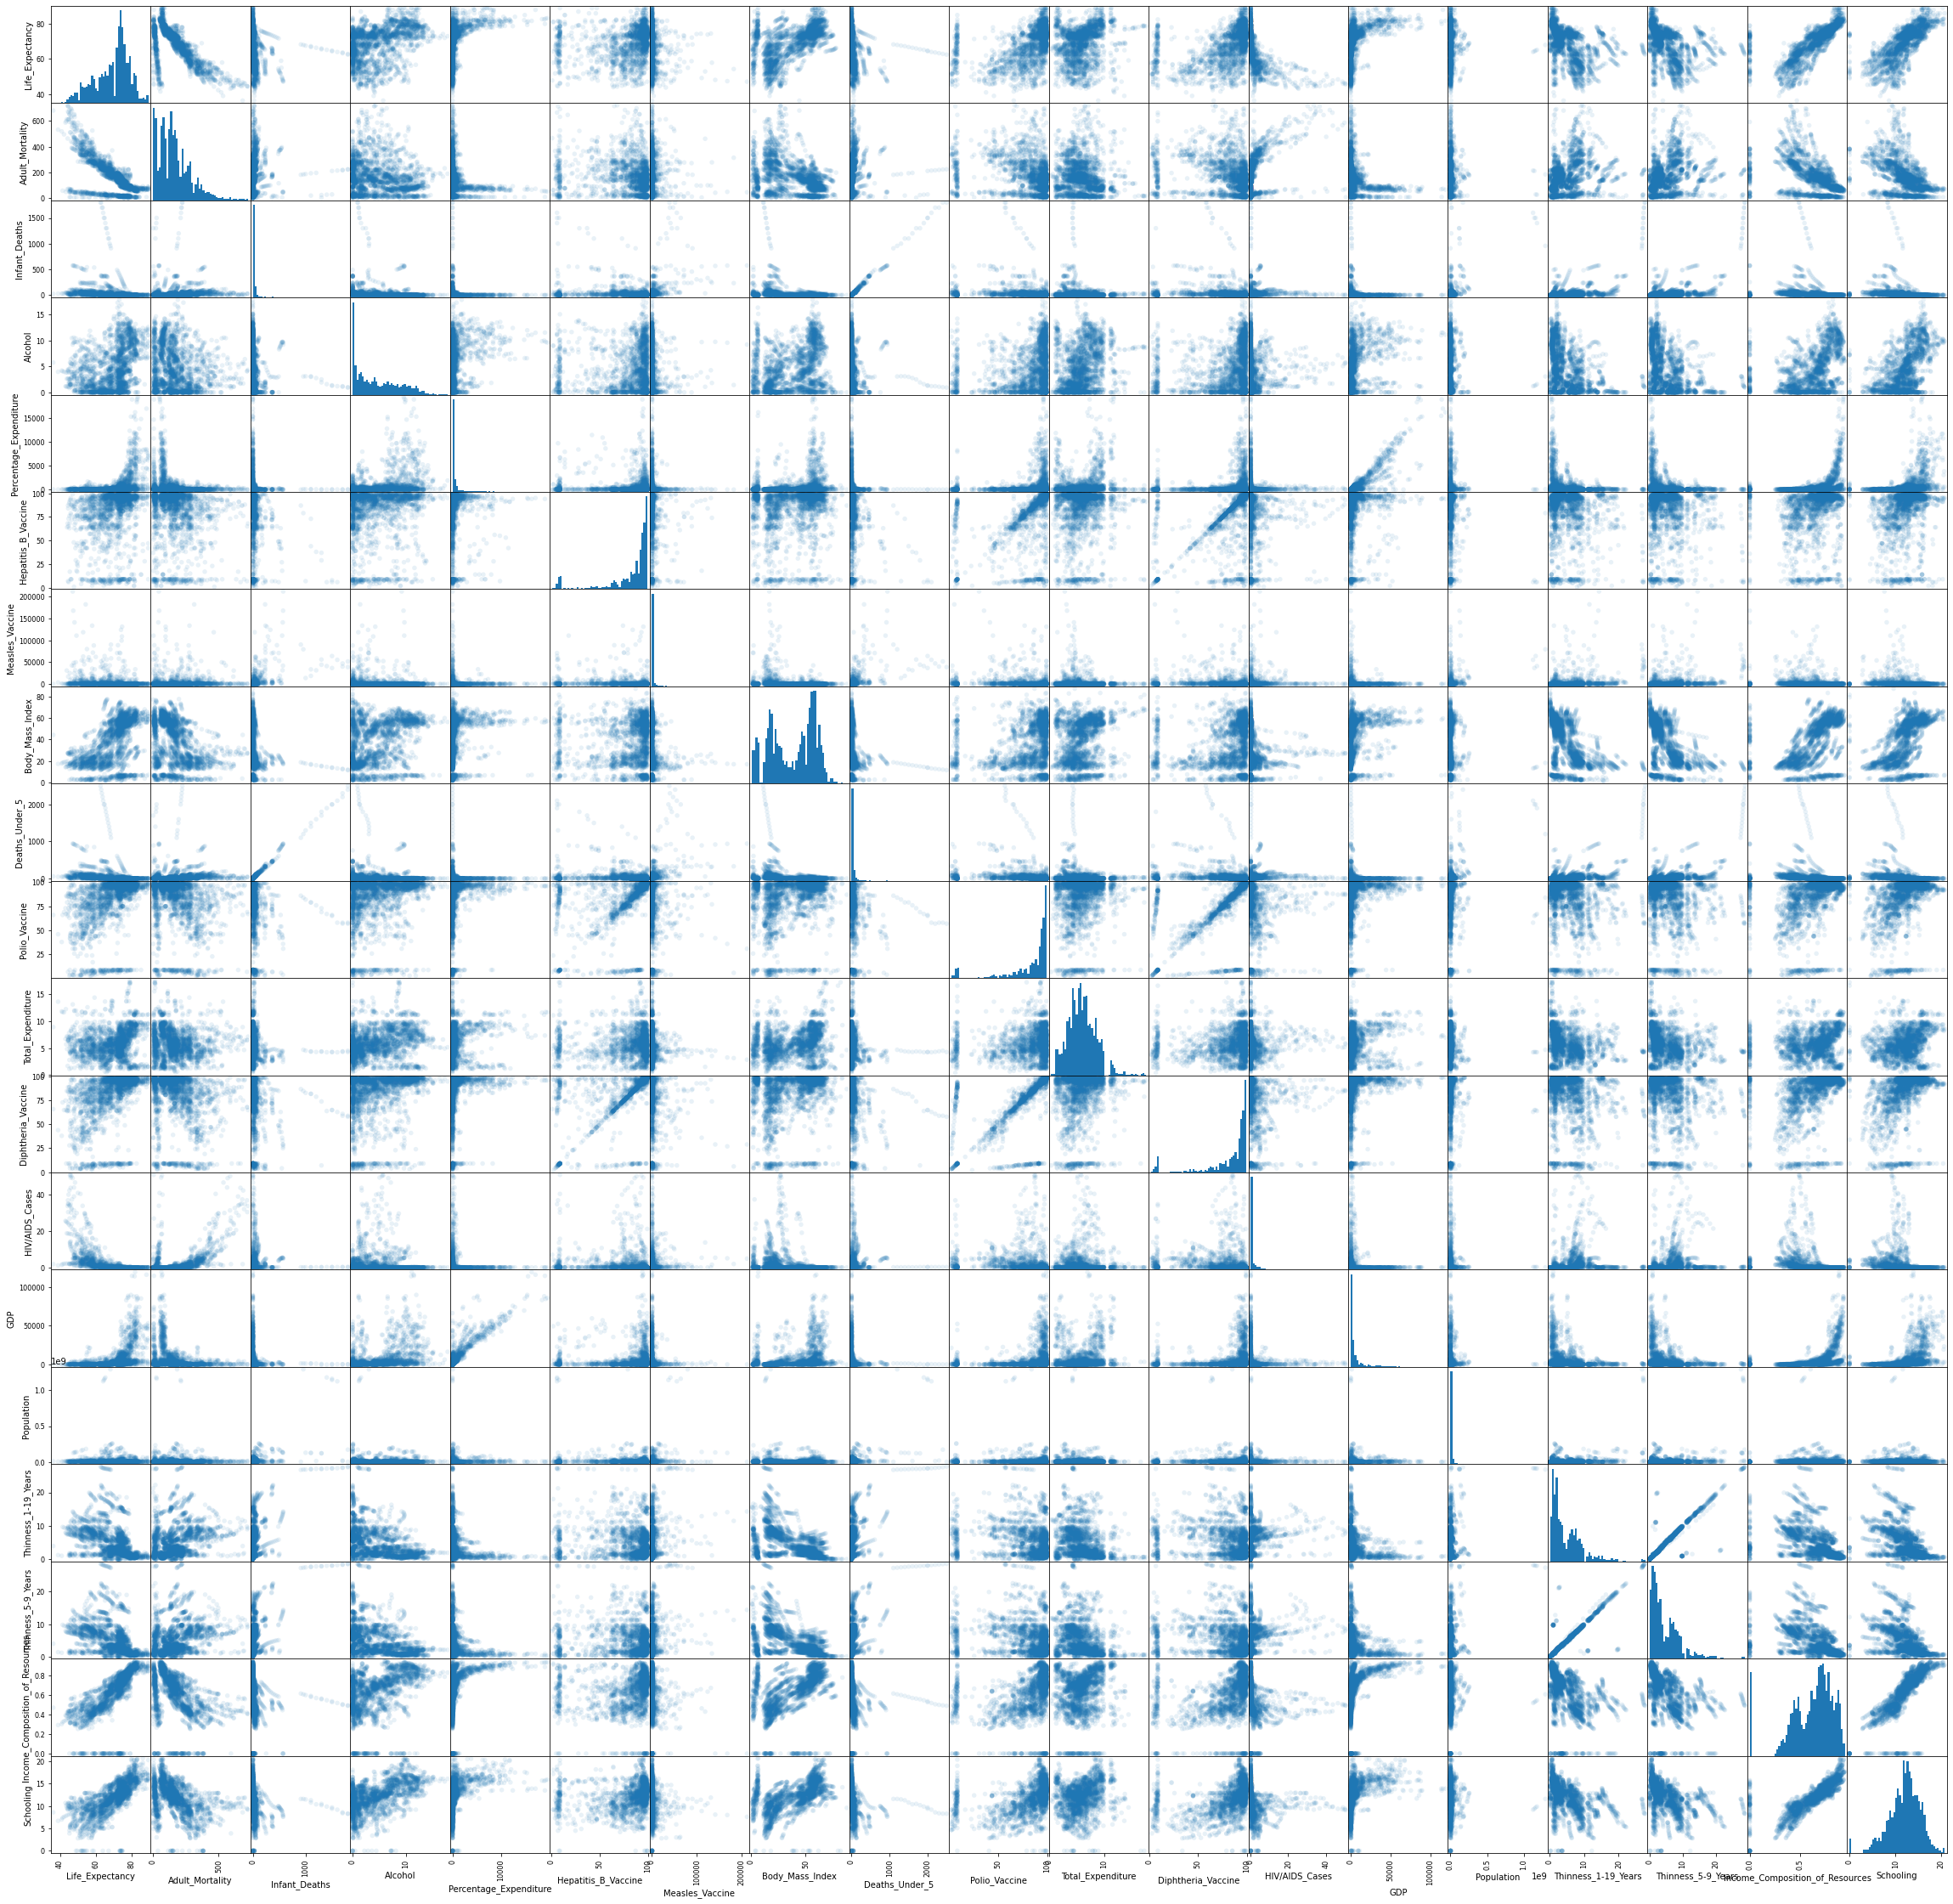

In [206]:
pd.plotting.scatter_matrix(cont_columns, figsize=(40, 40), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

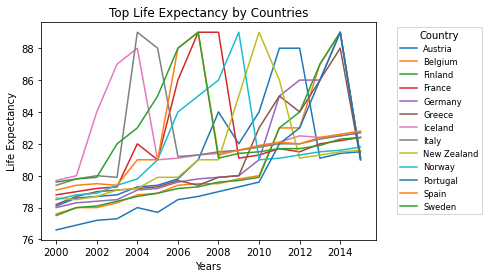

In [209]:
from matplotlib.font_manager import FontProperties

top15 = df[["Country","Life_Expectancy"]].nlargest(15,["Life_Expectancy"])
bttm15 = df[["Country","Life_Expectancy"]].nsmallest(20,["Life_Expectancy"])
most_countries = df[df['Country'].isin(top15['Country']) ]

least_countries = df[df['Country'].isin(bttm15['Country']) ]

most_least_countries = df[df['Country'].isin(top15['Country']) | df['Country'].isin(bttm15['Country']) ]

groups = most_countries.groupby("Country")
for name, group in groups:
#    plt.plot(group["Year"], group["Life expectancy "], marker="o", linestyle="", label=name)
    plt.plot( group["Year"],group["Life_Expectancy"], label=name)

plt.title('Top Life Expectancy by Countries')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
fontP = FontProperties()
fontP.set_size('small')
plt.legend( title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

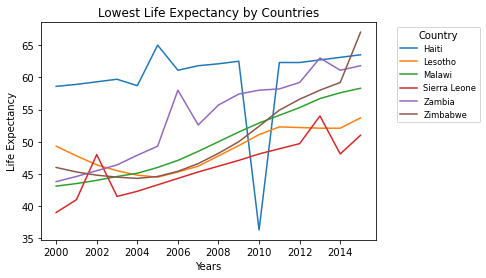

In [211]:
groups = least_countries.groupby("Country")
for name, group in groups:
#    plt.plot(group["Year"], group["Life expectancy "], marker="o", linestyle="", label=name)
    plt.plot( group["Year"],group["Life_Expectancy"], label=name)

plt.title('Lowest Life Expectancy by Countries')
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
fontP = FontProperties()
fontP.set_size('small')
plt.legend( title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

In [4]:
import seaborn as sns

correlation=df.corr()
correlation

Year  Life_Expectancy  Adult_Mortality  \
Year                             1.000000         0.170033        -0.079052   
Life_Expectancy                  0.170033         1.000000        -0.696359   
Adult_Mortality                 -0.079052        -0.696359         1.000000   
Infant_Deaths                   -0.037415        -0.196557         0.078756   
Alcohol                         -0.052990         0.404877        -0.195848   
Percentage_Expenditure           0.031400         0.381864        -0.242860   
Hepatitis_B_Vaccine              0.104333         0.256762        -0.162476   
Measles_Vaccine                 -0.082493        -0.157586         0.031176   
Body_Mass_Index                  0.108974         0.567694        -0.387017   
Deaths_Under_5                  -0.042937        -0.222529         0.094146   
Polio_Vaccine                    0.094158         0.465556        -0.274823   
Total_Expenditure                0.090740         0.218086        -0.115281   
Diphtheria_Vaccine               0.134337         0.479495        -0.275131   
HIV/AIDS_Cases                  -0.139741        -0.556556         0.523821   
GDP                              0.101620         0.461455        -0.296049   
Population                       0.016969        -0.021538        -0.013647   
Thinness_1-19_Years             -0.047876        -0.477183         0.302904   
Thinness_5-9_Years              -0.050929        -0.471584         0.308457   
Income_Composition_of_Resources  0.243468         0.724776        -0.457626   
Schooling                        0.209400         0.751975        -0.454612   

                                 Infant_Deaths   Alcohol  \
Year                                 -0.037415 -0.052990   
Life_Expectancy                      -0.196557  0.404877   
Adult_Mortality                       0.078756 -0.195848   
Infant_Deaths                         1.000000 -0.115638   
Alcohol                              -0.115638  1.000000   
Percentage_Expenditure               -0.085612  0.341285   
Hepatitis_B_Vaccine                  -0.223566  0.087549   
Measles_Vaccine                       0.501128 -0.051827   
Body_Mass_Index                      -0.227279  0.330408   
Deaths_Under_5                        0.996629 -0.112370   
Polio_Vaccine                        -0.170689  0.221734   
Total_Expenditure                    -0.128616  0.296942   
Diphtheria_Vaccine                   -0.175171  0.222020   
HIV/AIDS_Cases                        0.025231 -0.048845   
GDP                                  -0.108427  0.354712   
Population                            0.556801 -0.035252   
Thinness_1-19_Years                   0.465711 -0.428795   
Thinness_5-9_Years                    0.471350 -0.417414   
Income_Composition_of_Resources      -0.145139  0.450040   
Schooling                            -0.193720  0.547378   

                                 Percentage_Expenditure  Hepatitis_B_Vaccine  \
Year                                           0.031400             0.104333   
Life_Expectancy                                0.381864             0.256762   
Adult_Mortality                               -0.242860            -0.162476   
Infant_Deaths                                 -0.085612            -0.223566   
Alcohol                                        0.341285             0.087549   
Percentage_Expenditure                         1.000000             0.016274   
Hepatitis_B_Vaccine                            0.016274             1.000000   
Measles_Vaccine                               -0.056596            -0.120529   
Body_Mass_Index                                0.228700             0.150380   
Deaths_Under_5                                -0.087852            -0.233126   
Polio_Vaccine                                  0.147259             0.486171   
Total_Expenditure                              0.174420             0.058280   
Diphtheria_Vaccine                             0.143624             0.611495

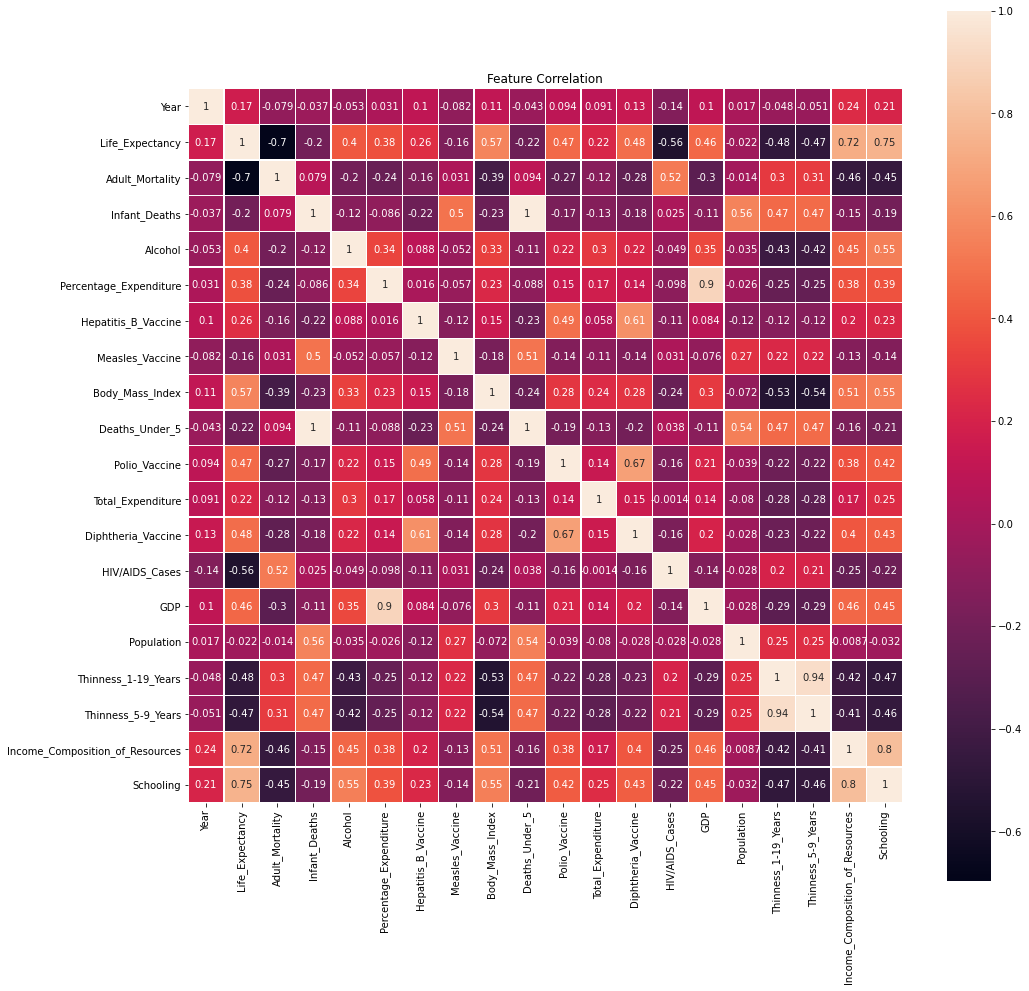

In [10]:
plt.figure(figsize=(16,16))
sns.heatmap(correlation, square=True, annot=True, linewidths=.25)
plt.title("Feature Correlation")
plt.show()

# 2) Missing Data: 
- Take a look at the missing information and attach the type of Missing

In [88]:
EDA_df = pd.DataFrame({'Feature': [] , 'Data_Type': [], 'Total_Observations':[], 'Missing_Values':[], 'Missing_Ratio':[]}) 
EDA_col = pd.DataFrame()
for feature in df.columns.values:
    EDA_df = EDA_df.append(pd.Series([feature , str(df[feature].dtypes),  df[feature].value_counts().sum(), df[feature].isna().sum(),  round(((df[feature].isna().sum())/(2938))*100,2)],  index = EDA_df.columns), ignore_index=True)
srt_EDAdf = EDA_df.sort_values(by = 'Missing_Ratio', ascending = False)
srt_EDAdf

Feature Data_Type  Total_Observations  \
17                       Population   float64              2286.0   
8               Hepatitis_B_Vaccine   float64              2385.0   
16                              GDP   float64              2490.0   
13                Total_Expenditure   float64              2712.0   
6                           Alcohol   float64              2744.0   
20  Income_Composition_of_Resources   float64              2771.0   
21                        Schooling   float64              2775.0   
19               Thinness_5-9_Years   float64              2904.0   
18              Thinness_1-19_Years   float64              2904.0   
10                  Body_Mass_Index   float64              2904.0   
12                    Polio_Vaccine   float64              2919.0   
14               Diphtheria_Vaccine   float64              2919.0   
3                   Life_Expectancy   float64              2928.0   
4                   Adult_Mortality   float64              2928.0   
15                   HIV/AIDS_Cases   float64              2938.0   
0                           Country    object              2938.0   
1                              Year     int64              2938.0   
9                   Measles_Vaccine     int64              2938.0   
7            Percentage_Expenditure   float64              2938.0   
5                     Infant_Deaths     int64              2938.0   
2                            Status    object              2938.0   
11                   Deaths_Under_5     int64              2938.0   

    Missing_Values  Missing_Ratio  
17           652.0          22.19  
8            553.0          18.82  
16           448.0          15.25  
13           226.0           7.69  
6            194.0           6.60  
20           167.0           5.68  
21           163.0           5.55  
19            34.0           1.16  
18            34.0           1.16  
10            34.0           1.16  
12            19.0           0.65  
14            19.0           0.65  
3             10.0           0.34  
4             10.0           0.34  
15             0.0           0.00  
0              0.0           0.00  
1              0.0           0.00  
9              0.0           0.00  
7              0.0           0.00  
5              0.0           0.00  
2              0.0           0.00  
11             0.0           0.00

###### TBD Removal:
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]

plt.barh(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].columns,
     round(perc_missing_per_ftr[perc_missing_per_ftr > 0],2))
plt.ylabel('Feature')
plt.xlabel('Missing Observations (%)')
plt.xlim(0, .25)

plt.title('Missing Data')

for index, value in enumerate(round(perc_missing_per_ftr[perc_missing_per_ftr > 0],2)):
    plt.text(value, index, str(value))

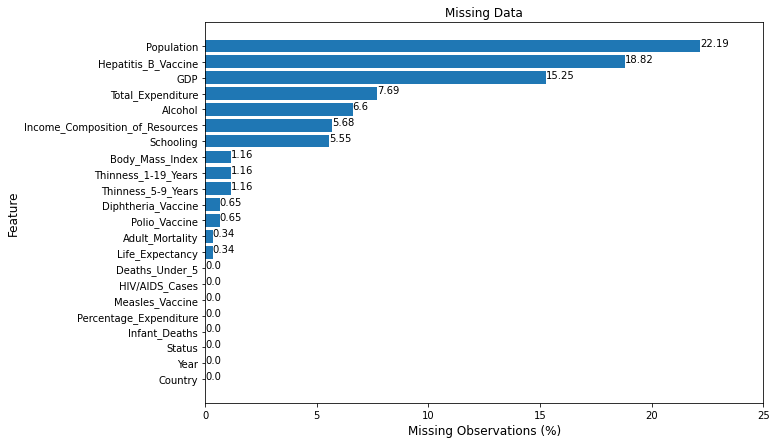

In [154]:
pltsrt_EDAdf = EDA_df.sort_values(by = 'Missing_Ratio')
fig, ax = plt.subplots()

miss_x = pltsrt_EDAdf['Feature']
miss_y = pltsrt_EDAdf['Missing_Ratio']
plt.barh(miss_x,miss_y )
plt.ylabel('Feature', fontsize=12)
ax.set_yticklabels(miss_x, rotation=0, fontsize=10)
#plt.ylim(-1, 21)

plt.xlabel('Missing Observations (%)', fontsize=12)
plt.xlim(0, 25)

plt.title('Missing Data')
for index, value in enumerate(miss_y):
    plt.text(value, index, str(value))
fig = plt.gcf()
fig.set_size_inches(10, 7, forward=True)    
plt.show()